# Desafio - NLP Multiclass Classification

<h3> Objetivo:

Criação de modelo de aprendizagem de máquina para classificação.

---



# Instalação e Importação das bibliotecas utilizadas no projeto
---

In [ ]:
import sys

# If statements testam se a biblioteca está instalada no ambiente.
if 'openpyxl' not in sys.modules:
  !pip install openpyxl
if 'pandas' not in sys.modules:
  !pip install pandas
if 'numpy' not in sys.modules:
  !pip install numpy
if 'tensorflow' not in sys.modules:
  !pip install tensorflow
if 'matplotlib' not in sys.modules:
  !pip install matplotlib
if 'seaborn' not in sys.modules:
  !pip install seaborn
if 'nltk' not in sys.modules:
  !pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação e tratamento de dados.
import pandas as pd
import numpy as np

# Tratamento e transformação de textos
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Visualização de dados.
import seaborn as sns
import matplotlib.pyplot as plt
# Função para renderizar a plotagem no próprio notebook
%matplotlib inline

# Separação da amostra e modelagem.
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, InputLayer

# Seed randomica do tensorflow
tf.keras.utils.set_random_seed(0)
!TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD=3221225472

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



---
# Análise exploratória dos dados

<h4>Aqui, iremos analisar e tentar obter um entendimento mais aprofundado das características da base e seus dados.
<br>Primeiramente, através de uma análise filosófica e intuitiva através da observação dos dados brutos e logo após, uma análise estatística.</h4>

---


In [ ]:
# Importação da base de dados
url = 'https://drive.google.com/u/0/uc?id=1mKhb8Yd-2-aaZjB6UNWaIyLyq0cqs3LP&export=download'
df = pd.read_csv(url, sep='\t', index_col=0)

In [ ]:
# Visualização das dimensões do DataFrame e suas 5 primeiras e últimas linhas;
display(df.shape)
display(df.head())
display(df.tail())

(170583, 15)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
762868,UK,29723892,R3VNENIATVV8QE,B00NOPQU2K,627793267,The Girl on the Train,5,0,1,N,N,Gripping you right where it matters,I know to say a story is &#34;gripping&#34; is...,2015-04-27,Digital_Ebook_Purchase
1284183,UK,41072087,R2U3LV67N99770,B0013F2LSK,13214624,11,5,2,5,N,Y,The Best of Me,"This album is totally fantastic, a great mix o...",2008-03-18,Music
1599315,UK,49938094,R3RO94POCHNI9V,B005CVWWJY,769273676,Ready Player One,5,0,0,N,Y,superb,Enjoyed every second of this book. It took me...,2014-08-28,Digital_Ebook_Purchase
204782,UK,14398213,R3S2BB5SBWBC1,B00008AWV3,841759677,The Four Feathers [DVD] [1939],5,1,1,N,Y,"Sweeping, authentic historic drama",I loved the historic scenes---the English coun...,2013-12-27,Video DVD
352938,UK,20140500,R27E2PNXJSWJIN,B00FAXJHCY,803172158,The Martian,4,0,0,N,Y,... a few pages to get through it but a good b...,May have skipped a few pages to get through it...,2015-06-06,Digital_Ebook_Purchase


,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
843070,UK,31382000,R2JQMEUPGDUTRO,0141311304,959905089,Charlie and the Chocolate Factory (Puffin Fict...,5,4,6,N,N,I love this story!!!,"I am Roald Dahl's biggest fan, and I loved thi...",2005-09-16,Books
374031,UK,20610933,R1BDFC9WVCD9OE,B003QP47RI,224139336,The Pacific - Complete HBO Series [Blu-ray][20...,4,1,2,N,Y,heart wrenching,Being a big fan of Band of Brothers I was real...,2011-01-25,Video DVD
823240,UK,30997535,R15QX5WRNE637I,B002IVLH6A,683468314,Backspacer (Limited Edition Gatefold Sleeve),5,18,19,N,N,Brief but I don't feel short changed!,Oh my god I could never have dreamed it would ...,2009-09-16,Music
1319331,UK,42013076,R3E8T5JVJQUSH7,B0002KQNUO,176254273,Alegria,5,1,1,N,N,Allegria cd,I love this cd. I have seen the show twice and...,2013-10-19,Music
254143,UK,17586200,R16NUX4YBN3K9I,B0098XY5VK,221763965,Hot Dog Bush,5,0,0,N,Y,best game EVER!!!!!!,Beware you can never stop playing this game it...,2014-04-10,Mobile_Apps


In [ ]:
# Colunas da base de dados
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'star_rating', 'helpful_votes',
       'total_votes', 'vine', 'verified_purchase', 'review_headline',
       'review_body', 'review_date', 'product_category'],
      dtype='object')

In [ ]:
# Colunas numéricas
df.select_dtypes(exclude='O').columns

Index(['customer_id', 'product_parent', 'star_rating', 'helpful_votes',
       'total_votes'],
      dtype='object')

In [ ]:
# Colunas não numéricas
df.select_dtypes('O').columns

Index(['marketplace', 'review_id', 'product_id', 'product_title', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'review_date',
       'product_category'],
      dtype='object')

In [ ]:
# Valores únicos por coluna
df.nunique()

marketplace               1
customer_id          144936
review_id            170583
product_id            27640
product_parent        13162
product_title         22970
star_rating               5
helpful_votes           278
total_votes             312
vine                      2
verified_purchase         2
review_headline       97426
review_body          157444
review_date            5497
product_category         32
dtype: int64

<h2>Obs:</h1>

<h5>
. As Dimensões do DataFrame são (170583, 15);
<br>. A coluna marketplace tem um valor constante em todas as linhas;
<br>. Os dados não numéricos possuem maior relevância do que os numéricos;
<br>. Será necessário a utilização de NLP para o tratamento das colunas não numéricas;
<br>. As colunas 'vine' e 'verified_purchase' podem ser transformadas em booleanas;
<br>. Palavras chaves para a categorização, como 'game', 'blu-ray' e 'cd' podem ser encontradas nas colunas 'product_title', 'review_headline'	e 'review_body'.
</h5>

---

In [ ]:
# Ocorrências de um mesmo produto no DataFrame.
display(df['product_title'].groupby(df.product_title).count())

# Produtos únicos no DataFrame
print(f'\nUnique titles: {len(df.product_id.unique())}')

product_title
#1's                 2
#1's [Clean]         1
#3                  24
#3 (Deluxe)          5
#3 [Explicit]        3
                    ..
xx (Digipack)        9
¡DOS! [Explicit]     2
¡TRÉ! [Explicit]     3
¡UNO! [Explicit]     3
Überjam Deux         2
Name: product_title, Length: 22970, dtype: int64


Unique titles: 27640


Video DVD                   46424
Music                       32742
Digital_Ebook_Purchase      28971
Books                       25842
Mobile_Apps                 21851
Digital_Video_Download       3151
Digital_Music_Purchase       2850
Toys                         2463
PC                           1591
Camera                        672
Electronics                   576
Wireless                      559
Video                         454
Baby                          420
Video Games                   395
Watches                       329
Musical Instruments           262
Sports                        256
Home                          250
Shoes                         183
Home Improvement              112
Office Products               101
Automotive                     51
Lawn and Garden                24
Health & Personal Care         19
Personal_Care_Appliances       13
Software                        7
Kitchen                         6
Home Entertainment              5
Luggage       

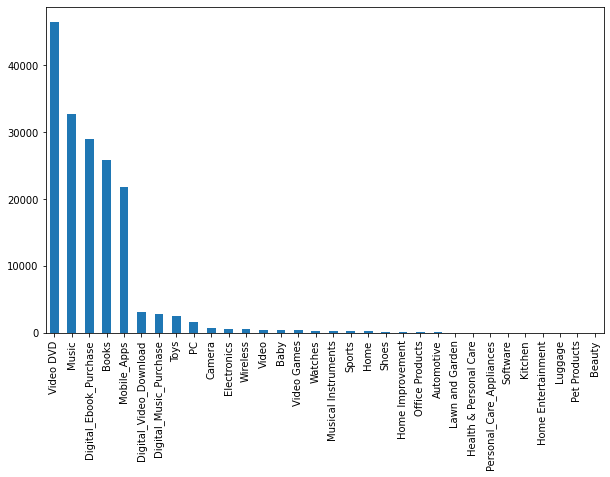

In [ ]:
# Distribuição dos produtos por categoria
df.product_category.value_counts().plot.bar(figsize=(10,6))
display(df.product_category.value_counts())

In [ ]:
# Verificação da quantidade de valores nulos por coluna
df.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          1
review_date          5
product_category     0
dtype: int64

<h2> Obs:

<h5>Uma vez que existem apenas 6 valores nulos em todo o DataFrame, é possível analisar cada caso individualmente.
</h5>

---

In [ ]:
# Visualização das linhas com ocorrência de valores nulos.
display(df.loc[df.review_date.isna()])
display(df.loc[df.review_body.isna()])

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
1587456,UK,49657014,R3RZPD88IVMZW1,B00L1OVE4K,339242307,Wallflower,5,0,0,N,Y,\tI'm glad to see the balance of the reviews p...,2009-05-29,NaN,Music
1688952,UK,52359937,RPBGTV73OH3PQ,1472200349,404640137,The Ocean at the End of the Lane,2,2,5,N,Y,as it was top-rated both on Amazon and Good R...,2003-05-20,NaN,Books
1435045,UK,45833447,R3ASZ8O5XPMTAL,B001DTKY08,32055653,The Incredible Hulk [Blu-ray] [Region Free],4,0,0,N,N,The incredible hulk\tThis is a very nice actio...,2012-09-21,NaN,Video DVD
53241,UK,5141421,R36Z6GMKU77J9Z,0199571120,346985014,Oxford Dictionary of English,5,0,0,N,Y,all -you- need- to- know - in- one- easy- find...,2014-07-13,NaN,Books
1506173,UK,47740923,R153LGOZWKETW6,B0002TR7OG,840084782,Troy (2-Disc Widescreen Edition) [DVD] [2004],3,0,6,N,N,I Troyed it & liked it !\tThere is a lot of gu...,2003-10-22,NaN,Video DVD


,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
591037,UK,25899716,R2BK81KZD1IX3Y,B008XG1X18,752212580,Pinterest,4,0,0,N,Y,Four Stars,NaN,2015-05-26,Mobile_Apps


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Verificação do conteúdo da coluna 'review_headline' dos casos nulos.
display(df.loc[df.review_date.isna()].iloc[:,11:12])
display(df.loc[df.review_body.isna()])

,review_headline
1587456,\tI'm glad to see the balance of the reviews p...
1688952,as it was top-rated both on Amazon and Good R...
1435045,The incredible hulk\tThis is a very nice actio...
53241,all -you- need- to- know - in- one- easy- find...
1506173,I Troyed it & liked it !\tThere is a lot of gu...


,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
591037,UK,25899716,R2BK81KZD1IX3Y,B008XG1X18,752212580,Pinterest,4,0,0,N,Y,Four Stars,NaN,2015-05-26,Mobile_Apps


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.



<h2>É possível observar que:
<h5>Os valores nulos da coluna 'review_date' foram causados por um erro grave de digitação dos dados que ocasionou nas linhas armazenarem strings muito extensas referentes à parte do próprio DataFrame.
<br>Já o único valor nulo do 'review_body' foi causado provavelmente por um cliente que não escreveu sua avaliação.
<br>Iremos tratar todos esses valores nulos na sessão de 'Limpeza e Tratamento dos Dados'.
<br> A proporção entre cada categoria de produto é desbalanceada.
</h5>

---

# Limpeza e Tratamento dos Dados

Nessa sessão, iremos tratar os valores nulos e transformar os dados não numéricos em numéricos para que seja possível utilizá-los como features para o treinamento e validação do nosso modelo.

---

In [ ]:
df.loc[df.review_date.isna(), 'review_headline'].str.split('\t', 2, expand=True).iloc[:, 0]

1587456                                                     
1688952     as it was top-rated both on Amazon and Good R...
1435045                                  The incredible hulk
53241      all -you- need- to- know - in- one- easy- find...
1506173                             I Troyed it & liked it !
Name: 0, dtype: object

In [ ]:
df.loc[df.review_date.isna(), ['review_headline', 'review_body']]

,review_headline,review_body
1587456,\tI'm glad to see the balance of the reviews p...,2009-05-29
1688952,as it was top-rated both on Amazon and Good R...,2003-05-20
1435045,The incredible hulk\tThis is a very nice actio...,2012-09-21
53241,all -you- need- to- know - in- one- easy- find...,2014-07-13
1506173,I Troyed it & liked it !\tThere is a lot of gu...,2003-10-22


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


<h2>Tratamento dos dados nulos.</h3>
<h5>
Como observado antes, estão com diferentes valores na coluna 'review_headline' e com isso,
precisam ser tratadas de formas diferentes. 
<br>A primeira linha não possuí informação
sobre ela mesma então será descartada. Já as outras receberão um tratamento de separação
do dataframe dentro da coluna e as duas primeiras partes serão realocadas respectivamente
nas colunas 'review_headline' e 'review_body'.

In [ ]:
# Descarte da primeira linha nula.
df.drop(df.loc[df.review_id == 'R3RZPD88IVMZW1', 'review_id'].index, axis=0, inplace=True)

# Separação do dataframe inserido na coluna 'review_headline' em duas partes com base nas tabulação dos mesmos.
corrected_cols = df.loc[df.review_date.isna(), 'review_headline'].str.split('\t', 2, expand=True).iloc[:, :2]

# Realocação dos valores em suas respectivas colunas
df.loc[df.review_date.isna(), 'review_headline'],\
df.loc[df.review_date.isna(), 'review_body'],\
df.loc[df.review_date.isna(), 'review_date'] = corrected_cols.iloc[:, 0],\
corrected_cols.iloc[:, 1],\
df.loc[df.review_date.isna(), 'review_body']

# Já o caso do review_body, iremos apenas trocar o valor nulo por uma string vazia.
df.review_body.fillna('', axis=0, inplace=True)

# Exclusão da variável para melhor alocação de memória.
del corrected_cols

In [ ]:
df.loc[df.index.isin([1587456, 1688952, 1435045, 53241, 1506173])]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
1688952,UK,52359937,RPBGTV73OH3PQ,1472200349,404640137,The Ocean at the End of the Lane,2,2,5,N,Y,as it was top-rated both on Amazon and Good R...,s it was my turn to chose a book for the book ...,2003-05-20,Books
1435045,UK,45833447,R3ASZ8O5XPMTAL,B001DTKY08,32055653,The Incredible Hulk [Blu-ray] [Region Free],4,0,0,N,N,The incredible hulk,This is a very nice action movie a lot better ...,2012-09-21,Video DVD
53241,UK,5141421,R36Z6GMKU77J9Z,0199571120,346985014,Oxford Dictionary of English,5,0,0,N,Y,all -you- need- to- know - in- one- easy- find...,&#34;all -you- need- to- know - in- one- easy-...,2014-07-13,Books
1506173,UK,47740923,R153LGOZWKETW6,B0002TR7OG,840084782,Troy (2-Disc Widescreen Edition) [DVD] [2004],3,0,6,N,N,I Troyed it & liked it !,There is a lot of guff written about films the...,2003-10-22,Video DVD


<h3> Após essa limpeza... <h3>

<h5>
Com o DataFrame livre de valores nulos, iremos voltar nossa atenção para as colunas não numéricas relevantes apontadas anteriormente e observar algumas estatísticas com relação à quantidade de palavras em cada uma.

Colunas: 'product_title', 'review_headline' e 'review_body'


In [ ]:
'''
Mapeia o tamanho de todas as strings de cada coluna e cria uma nova coluna no 
DataFrame com essas informações.
'''
df['review_body_len'] = df.review_body.map(lambda x: len(x.split()))
df['review_headline_len'] = df.review_headline.map(lambda x: len(x.split()))
df['product_title_len'] = df.product_title.map(lambda x: len(x.split()))


display(df['review_body_len'].describe())
display(df['review_headline_len'].describe())
display(df['product_title_len'].describe())

count    170582.000000
mean         65.946706
std         130.429301
min           0.000000
25%          13.000000
50%          27.000000
75%          64.000000
max        5450.000000
Name: review_body_len, dtype: float64

count    170582.000000
mean          3.572475
std           2.948597
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          35.000000
Name: review_headline_len, dtype: float64

count    170582.000000
mean          5.520905
std           3.857454
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          60.000000
Name: product_title_len, dtype: float64

In [ ]:
df.loc[df['review_body_len'] == df['review_body_len'].max()]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category,review_body_len,review_headline_len,product_title_len
676902,UK,27837794,R30K7CATYQ7WYX,B0041SMF4Q,320154727,Metropolis [Reconstructed & Restored] (Masters...,4,7,12,N,Y,A Superb Visual Feast or a Broken-backed Mess?,It is both ironic and unfortunate that Fritz L...,2013-07-09,Video DVD,5450,8,9


<h5>Na coluna 'review_body' podemos observar um grande outlier que ao verificá-lo, é possível perceber que o texto é naturalmente extenso, porém existe repetições de parágrafos nele.

In [ ]:
# Separação dos parágrafos do texto para uma melhor vizualização e tratamento.
outlier_split = df.loc[df['review_body_len'] == df['review_body_len'].max(), 'review_body'].str.split('<br /><br />', 11, expand=True)

In [ ]:
# Parágrafos 8 a 11 são repetições.
outlier_split

,0,1,2,3,4,5,6,7,8,9,10,11
676902,It is both ironic and unfortunate that Fritz L...,The legendary reputation of Metropolis rests a...,If only this splendid visual virtuosity could ...,The main problem with Metropolis is that the b...,Then we could attempt a political reading of t...,Then there is Metropolis as an allegory of the...,Most obviously of all would appear to be some ...,Throwing in allusions to intellectual heavy-we...,Then we could attempt a political reading of t...,Then there is Metropolis as an allegory of the...,Most obviously of all would appear to be some ...,Throwing in allusions to intellectual heavy-we...


In [ ]:
# Atribuição do texto sem repetições.
df.loc[df['review_body_len'] == df['review_body_len'].max(), 'review_body'] = ' '.join(outlier_split.iloc[0, :8])

# Exclusão da variável para melhor alocação de memória.
del outlier_split

<h2>Agora livre de valores nulos e com a base de dados estável...</h2>
<h5>podemos nos voltar para a transformação dos textos em informações computáveis (números). Para isso, iremos criar algumas funções de processamento de texto que irão excluir carácteres e palavras irrelevantes e escolher as palavras mais relevantes entre os textos de cada coluna, contá-las e dispô-las em colunas.

In [ ]:
def remove_irrelevant_chars(text, stop_words):
  '''
  remove_irrelevant_chars caracteres que não são espaços ou letras.

  :param text: Texto que será processado.
  :param stop_words: Lista de palavras irrelevantes para serem removidas.
  :return: Retorna o texto sem os caracteres indesejados.
  '''
  if text is np.nan:
    return ''
  text = str(text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('\d+', '', text)
  text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])
  return text


def tokenize_data(x, xtrain=None, maxwords=1000, mode='tfidf', xtrain_processing=True, configs=None):
  '''
  tokenize_data lê uma lista de textos, escolher uma quantidade de palavras mais relevantes
  e transformar cada uma em uma coluna com um valor obtido através do parametro 'mode'
  em cada texto

  :param x:  Lista de palavras que o modelo irá transformar.
  :param xtrain: Lista de palavras que o modelo irá usar para o treinamento e/ou transformação.
  :param maxwords: Define a quantidade de palavras máximas escolhidas pelo algoritmo.
  :param mode: Define método de atribuição de valores para as palavras em cada texto
    'binary' = 1:Existe / 2:Não Existe;
    'count' = Quantidade de ocorrências da palavra na frase;
    'tfidf' = Valor TF-IDF;
    'freq' = Frequência de ocorrências da palavra na frase.
  :param xtrain_processing: Condição para o 'x1' também ser processado.
  :param configs: Configurações préviamente indicadas do modelo Tokenizer.

  :arg tokenizer: Algoritmo que processará as palavras dos textos.
  :args x_tokenized, xtrain_tokenized: Listas finais com todas as transformações.
  :arg configs: Configurações préviamente indicadas do modelo Tokenizer.

  :return 1: Retorna a lista de ocorrências de palavras de cada texto junto com as configurações
   do Tokenizador.
  :return 2: Retorna as duas listas de ocorrências de palavras de cada texto junto com as
   configurações do Tokenizador.
  '''
  if configs is None:
    tokenizer = Tokenizer(
    num_words=maxwords,
    )
    try:
      tokenizer.fit_on_texts(xtrain)
    except:
      tokenizer.fit_on_texts(x)
    configs = tokenizer.to_json()
  else:
    tokenizer = tokenizer_from_json(configs)
  
  if xtrain is None or xtrain_processing == False:
    x_tokenized = tokenizer.texts_to_matrix(x, mode=mode)
    return x_tokenized, configs
  else:
    x_tokenized = tokenizer.texts_to_matrix(x, mode=mode)
    xtrain_tokenized = tokenizer.texts_to_matrix(xtrain, mode=mode)
    return x_tokenized, xtrain_tokenized, configs
    
def prepare_data(x, xtrain=None, token_configs=None, maxwords=(1100, 900, 800), mode='tfidf', stopwords=[], xtrain_processing=False):
  '''
  prepare_data prepara os dados não numéricos para a utilização em modelos de
  aprendizagem de máquina através da utilização das funções remove_irrelevant_chars
  e tokenize_data, como também concatena as colunas em um array 2D separado por
  linhas.

  :param x: Dataframe com colunas do tipo objeto (string) que a função irá processar.
  :param xtrain: (Opcional) Dataframe com colunas do tipo objeto (string) que a função
   irá usar para o treinamento e/ou transformação.
  :param maxwords: Define a quantidade de palavras máximas escolhidas pelo algoritmo
   da função tokenize_data.
  :param mode: Define método de atribuição de valores para as palavras em cada texto
   da função tokenize_data.
  :param stopwords: Lista de palavras irrelevantes para serem removidas para a
   função remove_irrelevant_chars.
  :param xtrain_processing: Condição para o 'xtrain' também ser processado.

  :args processed_x, processed_xtrain: Armazena os respectivos DataFrames/Listas
   através do pré-processamento.
  :arg i: Contador das colunas dos DataFrames.

  :return 1: Retorna os dados já processados dos arrays final_xtrain e final_x.
  :retunr 2: Retorna os dados já processados do array final_x1.
  '''
  processed_x, processed_xtrain, configs = [], [], []
  final_x, final_xtrain = [], []
  if token_configs is None:
    token_configs = [None for col in range(len(X.columns))]

  if xtrain_processing == False:
    for col in x.columns:
        processed_x.append([])
        configs.append([])
        i = len(processed_x)-1
        for text_x in x[col]:
          processed_x[i].append(remove_irrelevant_chars(text_x, stop_words))
          
    if xtrain is None:
        for col, colmaxwords in zip(range(len(processed_x)), maxwords):
          processed_x[col], configs[col]= tokenize_data(
                                            processed_x[col],
                                            configs=token_configs[col],
                                            maxwords=colmaxwords,
                                            mode=mode,
                                            xtrain_processing=xtrain_processing,
                                            )
    else:
      for col in x.columns:
        processed_xtrain.append([])
        configs.append([])
        i = len(processed_xtrain)-1
        for text_xtrain in xtrain[col]:
          processed_xtrain[i].append(remove_irrelevant_chars(text_xtrain, stop_words))
      for col, colmaxwords in zip(range(len(processed_x)), maxwords):
        processed_x[col], configs[col]= tokenize_data(
                                          processed_x[col],
                                          processed_xtrain[col],
                                          configs=token_configs[col],
                                          maxwords=colmaxwords,
                                          mode=mode,
                                          xtrain_processing=xtrain_processing,
                                          )

    x_rows_len = len(processed_x[0])
    
    
    processed_x = np.array([np.concatenate([x[i] for x in processed_x]) for i in range(x_rows_len)])

    return processed_x, configs
  else:
    for col in x.columns:
      processed_x.append([])
      configs.append([])
      i = len(processed_x)-1
      for text_x1 in x[col]:
        processed_x[i].append(remove_irrelevant_chars(text_x1, stop_words))

    for col in x.columns:
      processed_xtrain.append([])
      configs.append([])
      i = len(processed_xtrain)-1
      for text_xtrain in xtrain[col]:
        processed_xtrain[i].append(remove_irrelevant_chars(text_xtrain, stop_words))

    for col in range(len(processed_x)):
        processed_x[col], processed_xtrain[col], configs[col] = tokenize_data(
                                                          processed_x[col],
                                                          processed_xtrain[col],
                                                          configs=token_configs[col],
                                                          maxwords=maxwords[col],
                                                          mode=mode,
                                                          xtrain_processing=xtrain_processing
                                                          )
    x_rows_len = len(processed_x[0])
    xtrain_rows_len = len(processed_xtrain[0])

    processed_x = np.array([np.concatenate([x[i] for x in processed_x]) for i in range(x_rows_len)])
    processed_xtrain = np.array([np.concatenate([x[i] for x in processed_xtrain]) for i in range(xtrain_rows_len)])

    return processed_xtrain, processed_x, configs

def prepare_data_in_chunks(x, xtrain=None, chunks=3, token_configs=None, maxwords=(1100, 900, 800), mode='tfidf', stopwords=[], xtrain_processing=False):
  '''
  prepare_data_in_chunks pré-processa os dados não numéricos por partes para uma
  melhor utilização de memória.

  :param x: Dataframe com colunas do tipo objeto (string) que a função irá processar.
  :param xtrain: (Opcional) Dataframe com colunas do tipo objeto (string) que a função
   irá usar para o treinamento e/ou transformação.
  :param chunks: Quantidade de partes que os dados serão repartidos para o processamento.
  :param maxwords: Define a quantidade de palavras máximas escolhidas pelo algoritmo
   da função tokenize_data.
  :param mode: Define método de atribuição de valores para as palavras em cada texto
   da função tokenize_data.
  :param stopwords: Lista de palavras irrelevantes para serem removidas para a
   função remove_irrelevant_chars.
  :param xtrain_processing: Condição para o 'xtrain' também ser processado.

  :arg x_chunks: Armazena as partes processadas do 'x'.
  :arg xtrain_chunks: Armazena as partes processadas do 'xtrain'.
  :arg chunk_size: Armazena o tamanho de cada fatia de 'x'.
  :arg train_chunk_size: Armazena o tamanho de cada fatia de 'xtrain'.

  :return 1: Retorna o DataFrame 'x' pré-processado e as configurações do tokenizador.
  :return 2: Retorna o DataFrame 'x' pré-processado e as configurações do tokenizador.
  '''
  if token_configs is None:
    token_configs = prepare_data(x=x.iloc[:1],
                                 xtrain=x,
                                 maxwords=(1100, 900, 800),
                                 mode='count',
                                 stopwords=stopwords)[1]

  x_chunks = [[] for i in range(chunks)]
  chunk_size = len(x)//chunks
  if xtrain_processing == False:
    x_chunks[0] = prepare_data(x=x.iloc[:chunk_size], token_configs=token_configs)[0]
    for i in range(1, chunks-1):
      x_chunks[i] = prepare_data(x=x.iloc[chunk_size*i:chunk_size*(i+1)], token_configs=token_configs)[0]
    x_chunks[chunks-1] = prepare_data(x=x.iloc[chunk_size*(chunks-1):], token_configs=token_configs)[0]

    X_chunks = np.concatenate(x_chunks, axis=0)

  else:
    xtrain_chunks = [[] for i in range(chunks)]
    train_chunk_size = len(xtrain)//chunks
    
    xtrain_chunks[0], x_chunks[0] = prepare_data(x=x.iloc[:chunk_size],
                               xtrain=xtrain.iloc[:train_chunk_size],
                               token_configs=token_configs,
                               xtrain_processing=True,
                               )[:2]
    for i in range(1, chunks-1):
      xtrain_chunks[i], x_chunks[i] = prepare_data(x=x.iloc[chunk_size*i:chunk_size*(i+1)],
                                 xtrain=xtrain.iloc[train_chunk_size*i:train_chunk_size*(i+1)],
                                 token_configs=token_configs,
                                 xtrain_processing=True,
                                 )[:2]
                                 
    xtrain_chunks[chunks-1], x_chunks[chunks-1] = prepare_data(x=x.iloc[chunk_size*(chunks-1):],
                                      xtrain=xtrain.iloc[train_chunk_size*(chunks-1):],
                                      token_configs=token_configs,
                                      xtrain_processing=True,
                                      )[:2]

    x_chunks = np.concatenate(x_chunks, axis=0)
    xtrain_chunks = np.concatenate(xtrain_chunks, axis=0)

    return  xtrain_chunks, x_chunks, token_configs
  return X_chunks, token_configs
  

<h5>Com as funções já preparadas, podemos definir as features que serão utilizadas no treinamento e validação do modelo.
As FEATURES escolhidas foram 'product_title',  'review_headline' e 'review_body'.
<br>Já a variável TARGET do nosso modelo será a 'product_category' que será processada através do método de OneHotEncoding.

In [ ]:
# Atribuição das colunas de feature à variável 'X_cols'
X_cols = ['product_title', 'review_headline', 'review_body']

# Filtragem do DataFrame apenas com as features para a variável 'X'
X = df[X_cols]

# Separação da coluna target na variável 'y'
y = pd.get_dummies(df.product_category)

# Repartição da amostra de treinamento e teste com proporções de 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Importação de palavras irrelevantes da língua inglesa.
stop_words = stopwords.words('english')


# Execução do pré-processamento.
# Pré processamento da fase de avaliação do modelo.
'''
X_train_final, X_test_final, tokonfigs = prepare_data_in_chunks(
                                           xtrain=X_train,
                                           x=X_test,
                                           maxwords=(1200, 900, 800),
                                           mode='count',
                                           stopwords=stop_words,
                                           xtrain_processing=True,)
'''
# Pré processamento da amostra de treinamento final.

# (1100, 900, 800)
X_final, tokonfigs = prepare_data_in_chunks(x=X, xtrain=X, chunks=3, maxwords=(1200, 1100, 900), mode='count', stopwords=stop_words)

KeyboardInterrupt: ignored

<h2>Com os dados já pré-processados podemos desenvolver nosso modelo de Aprendizagem de Máquina.</h2>

---

<h3>
<br>O modelo escolhido foi a Rede Neural Sequêncial da biblioteca TensorFlow/Keras.
</h3><h4>
<br>. Foram utilizadas 6 camadas, respectivamente:
<br>. Camada de Input com entrada de dimensões (max_words, );
<br>. Camada Densa com 512 nós e ativação ReLU (Linear Rectifier);
<br>. Camada de Dropout com frequência de 0.5 para amenizar o OverFitting;
<br>. Camada Densa com 256 nós e ativação ReLU (Linear Rectifier);
<br>. Camada Densa com 128 nós e ativação ReLU (Linear Rectifier);
<br>. Camada Densa de Output com num_classes(32) nós e ativação SoftMAX (Normalized Exponential), para a predição de múltiplas classes;
</h4><br><h3>O modelo foi compilado com as seguintes configurações:</h3><h4><br>Função de Perca (Loss) : 'categorical_crossentropy';
<br>Função de Otimização : 'Adam';
<br>Métrica de Validação : 'Accuracy'.

</h4>

In [ ]:
'''
max_words = len(X_train_final[0])
num_classes = len(y_train.columns)
'''
max_words = len(X_final[0])
num_classes = len(y.columns)

model = Sequential()
model.add(InputLayer(input_shape=(max_words,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.fit(X_train_final, y_train, validation_data=(X_test_final, y_test), epochs=3)
model.fit(X_final, y, epochs=3)

In [ ]:
'''
del X_train_final
del X_test_final
del X_train
del X_test
del y_train
del y_test
'''

del X_final


<h2>Com o modelo treinado, podemos criar nossa função de validação.

In [ ]:
def validate_model(df_without_product_category, token_configs=tokonfigs, model=model):
  '''
  validate_model processa os dados do dataframe indicado, seleciona as features
  e retorna o DataFrame com a coluna de procut_category prevista inclusa.

  :param df_without_product_category: DataFrame que terá as categorias previstas.
  :param df_base: DataFrame que será a base para o pré-processamento do df_without_product_category
  :param model: Modelo treinado previamente que será utilizado para a previsão.

  :arg stop_words: Lista de palavras irrelevantes para o pré-processamento.
  :arg classes: Lista com todas as categorias de produtos possíveis.
  :arg X: DataFrame pré-processado.
  :arg predicts: Armazena as previsões resultantes do modelo.
  'arg df_with_product_category: Armazena o DataFrame original com uma coluna adicional
   de previsões do product_category.

   :return: retorna o DataFrame com a coluna product_category inclusa.
  '''
  stop_words = stopwords.words('english')
  classes = ['Automotive', 'Baby', 'Beauty', 'Books', 'Camera',
       'Digital_Ebook_Purchase', 'Digital_Music_Purchase',
       'Digital_Video_Download', 'Electronics', 'Health & Personal Care',
       'Home', 'Home Entertainment', 'Home Improvement', 'Kitchen',
       'Lawn and Garden', 'Luggage', 'Mobile_Apps', 'Music',
       'Musical Instruments', 'Office Products', 'PC',
       'Personal_Care_Appliances', 'Pet Products', 'Shoes', 'Software',
       'Sports', 'Toys', 'Video', 'Video DVD', 'Video Games', 'Watches',
       'Wireless']

  X = prepare_data_in_chunks(
                  df_without_product_category[['product_title', 'review_headline', 'review_body']],
                  token_configs=token_configs
                   )[0]
  
  predicts = pd.DataFrame(model.predict(X), columns=classes)
  predicts = pd.DataFrame(predicts.idxmax(axis=1),
                          columns=['product_category']).set_index(df_without_product_category.index)
  df_with_product_category = pd.concat([df_without_product_category, predicts], axis=1)

  return df_with_product_category

In [ ]:
'''
preds = validate_model(df.drop(['product_category'], axis=1))
display(preds)
'''